<font size="6">Importing Libraries</font>

In [726]:
import pandas as pd
import string
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from itertools import tee, islice
import spacy
from spacy.tokens.token import Token

<font size="6">Reading Dataset</font>

In [727]:
data =  pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [728]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


<font size="6">Selecting row with Clothing ID == 1078 as it has maximum number of reviews</font>

In [729]:
data = data[data["Clothing ID"] == 1078]
data.reset_index(inplace = True)

In [730]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   index                    1024 non-null   int64 
 1   Unnamed: 0               1024 non-null   int64 
 2   Clothing ID              1024 non-null   int64 
 3   Age                      1024 non-null   int64 
 4   Title                    871 non-null    object
 5   Review Text              987 non-null    object
 6   Rating                   1024 non-null   int64 
 7   Recommended IND          1024 non-null   int64 
 8   Positive Feedback Count  1024 non-null   int64 
 9   Division Name            1024 non-null   object
 10  Department Name          1024 non-null   object
 11  Class Name               1024 non-null   object
dtypes: int64(7), object(5)
memory usage: 96.1+ KB


<font size="6">Removing un-necessary column from dataframe</font>

In [731]:
data.drop(["Unnamed: 0", "index"], inplace= True, axis = 1)

In [732]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1078,56,Great summer fabric!,"I really wanted this to work. alas, it had a s...",3,0,1,General Petite,Dresses,Dresses
1,1078,51,Sweet flattering dress,"I love cute summer dresses and this one, espec...",4,1,0,General Petite,Dresses,Dresses
2,1078,32,NaN,This is the perfect summer dress. it can be dr...,5,1,2,General Petite,Dresses,Dresses
3,1078,61,Great sweater dress!,"Nice fit and flare style, not clingy at all. i...",5,1,1,General,Dresses,Dresses
4,1078,33,"Cute, but cheap",When i first opened this dress and tried it on...,3,0,0,General,Dresses,Dresses


<font size="6">Handling 'NaN' Values</font>

In [733]:
data["Title"] = data["Title"].fillna("")
data["Title"] = data["Title"].replace(to_replace='nan',
           value='')
data['Review Text'] = data['Review Text'].fillna("")
data['Review Text'] = data['Review Text'].replace(to_replace='nan',
           value='')      

<font size="6">Converting all values to lowercase</font>

In [734]:
data["Review Text"] = data['Review Text'].apply(lambda x: x.lower() if isinstance(x, str) else x)
data["Title"] = data['Title'].apply(lambda x: x.lower() if isinstance(x, str) else x)

<font size="6">Merging 'Title' and 'Review Text' Column</font>

In [735]:
comb_data = pd.DataFrame()
comb_data["Text"] = data["Title"] + ' ' + data["Review Text"]

In [736]:
comb_data.shape

(1024, 1)

<font size="6">Handling apostrophe values in data</font>

In [737]:
apostrophe_words = {
'doesn\'t': ' does not ',
' doesnt ' : ' does not ',
'can\'t': ' can not ',
' cant ': ' can not ',
'won\'t': ' will not ',
' wont ': ' will not ',
'don\'t': ' do not ',
' dont ': ' do not ',
'i\'ve': ' i have ',
' ive ': ' i have ',
'i\'d': ' i would ',
' id ': ' i would ',
'i\'m': ' i am ',
' im ': ' i am ',
'i\'ll': ' i will ',
' ill ': ' i will ',
'she\'s': ' she is ',
' shes ': ' she is ',
'he\'s': ' he is ',
' hes ': ' he is ',
'it\'s': ' it is ',
' its ': ' it is ',
'there\'s': ' there is ',
' theres ': ' there is ',
'they\'re': ' they are ',
' theyre ': ' they are ',
'we\'re': ' we are ',
'you\'ve': ' you have ',
' youve ': ' you have ',
'you\'re': ' you are ',
' youre ': ' you are ',
'couldn\'t': ' could not ',
' couldnt ': ' could not ',
'shouldn\'t': ' should not ',
' shouldnt ': ' should not ',
'wouldn\'t': ' would not ',
' wouldnt ': ' would not ',
'wasn\'t': ' was not ',
' wasnt ': ' was not ',
'isn\'t': " is not ",
' isnt ': " is not ",
}

comb_data["Text"] = comb_data["Text"].astype(str)
for i in range(1024):
    correct_list = []
    text = comb_data["Text"][i]
    for key,value in apostrophe_words.items():
            if key in comb_data["Text"][i]:
                text = text.replace(key,value)
    comb_data["Text"][i] = text

<font size="6">Remove Extra spaces from dataset values</font>

In [738]:
for i in range(1024):
    comb_data["Text"][i] = re.sub(r'\s+', ' ', comb_data["Text"][i])
    comb_data["Text"][i] = comb_data["Text"][i].strip()

<font size="6">Punctuations Removal</font>

In [739]:
def remove_punct(text):
    corr_text = text.translate(str.maketrans('','','!#$%&*+,.:;<=>?@[\\]^_`{|}~'))
    return corr_text

In [740]:
correct_text = []
for text in comb_data["Text"]:
    correct_text.append(remove_punct(str(text)))

In [741]:
comb_data["Text"] = correct_text

<font size="6">Removing Emojies</font>

In [742]:
def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

In [743]:
comb_data["Text"] = comb_data["Text"].apply(deEmojify)

<font size="6">Stopwords Removal</font>

In [744]:
nlp = spacy.load("en_core_web_sm")
count = 0
for text in comb_data["Text"]:  
    doc = nlp(str(text))
    txt = ""
    for token in doc:
        if not token.is_stop:
           txt = txt + " " + token.text  
    comb_data["Text"][count] = txt
    count = count + 1

<font size="6">WordCount graph for 1-gram</font>

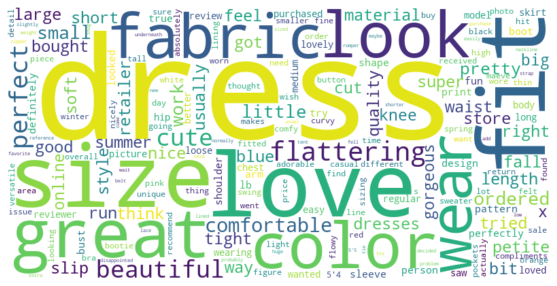

In [745]:
# Join all review texts into a single string
text = " ".join(comb_data["Text"])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white", collocations=False).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<font size="6">Formation of Bigram for Understanding Purpose</font>

In [746]:
# Function to create bigrams and trigrams
def create_ngrams(text):
    doc = nlp(text)
    words = [token.text for token in doc]
    
    # Create bigrams
    bigrams = list(zip(words, islice(words, 1, None)))
    
    return bigrams

In [747]:
bigram = comb_data["Text"].apply(create_ngrams)

In [748]:
print(bigram)

0       [( , great), (great, summer), (summer, fabric)...
1       [( , sweet), (sweet, flattering), (flattering,...
2       [( , perfect), (perfect, summer), (summer, dre...
3       [( , great), (great, sweater), (sweater, dress...
4       [( , cute), (cute, cheap), (cheap, opened), (o...
                              ...                        
1019    [( , beautiful), (beautiful, dress), (dress, f...
1020    [( , flattering), (flattering, unique), (uniqu...
1021    [( , breathtaking), (breathtaking, beautiful),...
1022    [( , high), (high, hopes), (hopes, purchased),...
1023    [( , falls), (falls, nicely), (nicely, bought)...
Name: Text, Length: 1024, dtype: object


In [749]:
list1 = []
for i in bigram:
    for j in i:
        if ' ' in j[0]:
            continue
        strl = j[0] + '_' + j[1]
        list1.append(strl)

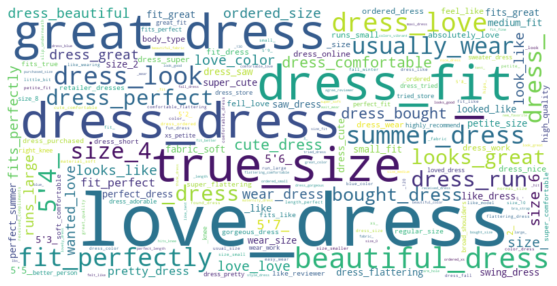

In [750]:
# Join all review texts into a single string
for i in bigram:
    text = " ".join(list1)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white", collocations=False).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<font size="6">Formation of trigram for understanding purpose</font>

In [751]:
# Function to create bigrams and trigrams
def create_ngrams(text):
    doc = nlp(text)
    words = [token.text for token in doc]

    # Create trigrams
    trigrams = list(zip(words, islice(words, 1, None), islice(words, 2, None)))
    
    return trigrams

In [752]:
trigram = comb_data["Text"].apply(create_ngrams)

In [753]:
print(trigram)

0       [( , great, summer), (great, summer, fabric), ...
1       [( , sweet, flattering), (sweet, flattering, d...
2       [( , perfect, summer), (perfect, summer, dress...
3       [( , great, sweater), (great, sweater, dress),...
4       [( , cute, cheap), (cute, cheap, opened), (che...
                              ...                        
1019    [( , beautiful, dress), (beautiful, dress, fit...
1020    [( , flattering, unique), (flattering, unique,...
1021    [( , breathtaking, beautiful), (breathtaking, ...
1022    [( , high, hopes), (high, hopes, purchased), (...
1023    [( , falls, nicely), (falls, nicely, bought), ...
Name: Text, Length: 1024, dtype: object


In [754]:
list1 = []
for i in trigram:
    for j in i:
        if ' ' in j[0]:
            continue
        strl = j[0] + '_' + j[1] + '_' + j[2]
        list1.append(strl)

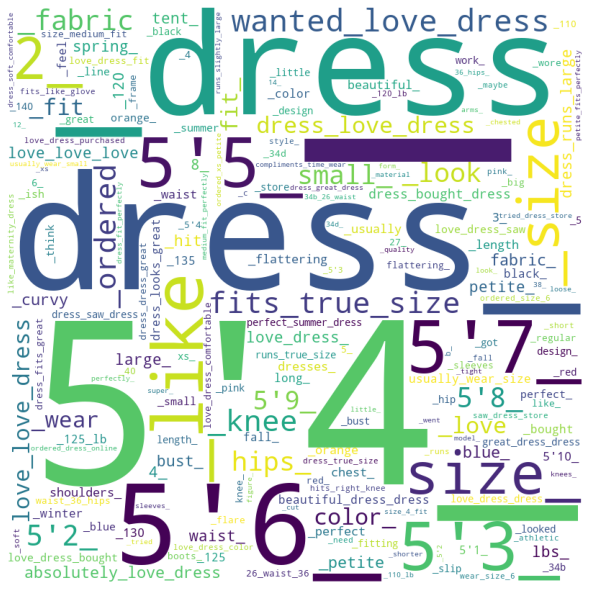

In [755]:
# Join all review texts into a single string
for i in trigram:
    text = " ".join(list1)

# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 3, collocations=False).generate(text)

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
# Show the plot
plt.show()

<font size="6">Creating Bigram and Trigram to understand POS relation within reviews</font>

In [756]:
# Function to create bigrams and trigrams
def create_ngrams(text):
    doc = nlp(text)
    words = [token.pos_ for token in doc]
    
    # Create bigrams
    bigrams = list(zip(words, islice(words, 1, None)))
    
    return bigrams

In [757]:
bigram = comb_data["Text"].apply(create_ngrams)

In [758]:
list1 = []
for i in bigram:
    for j in i:
        if 'SPACE' == j[0]:
            continue
        strl = j[0] + '_' + j[1]
        list1.append(strl)

In [759]:
bigram

0       [(SPACE, ADJ), (ADJ, NOUN), (NOUN, NOUN), (NOU...
1       [(SPACE, ADJ), (ADJ, ADJ), (ADJ, NOUN), (NOUN,...
2       [(SPACE, ADJ), (ADJ, NOUN), (NOUN, NOUN), (NOU...
3       [(SPACE, ADJ), (ADJ, NOUN), (NOUN, NOUN), (NOU...
4       [(SPACE, VERB), (VERB, ADJ), (ADJ, VERB), (VER...
                              ...                        
1019    [(SPACE, ADJ), (ADJ, NOUN), (NOUN, VERB), (VER...
1020    [(SPACE, ADJ), (ADJ, ADJ), (ADJ, ADJ), (ADJ, A...
1021    [(SPACE, VERB), (VERB, ADJ), (ADJ, NOUN), (NOU...
1022    [(SPACE, ADJ), (ADJ, NOUN), (NOUN, VERB), (VER...
1023    [(SPACE, VERB), (VERB, ADV), (ADV, VERB), (VER...
Name: Text, Length: 1024, dtype: object

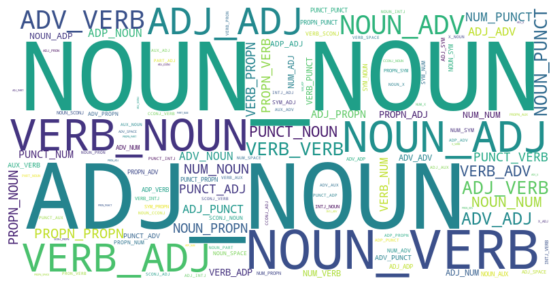

In [760]:
# Join all review texts into a single string
for i in bigram:
    text = " ".join(list1)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white", collocations=False).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [761]:
# Function to create bigrams and trigrams
def create_ngrams(text):
    doc = nlp(text)
    words = [token.pos_ for token in doc]

    # Create trigrams
    trigrams = list(zip(words, islice(words, 1, None), islice(words, 2, None)))
    
    return trigrams

In [762]:
trigram = comb_data["Text"].apply(create_ngrams)

In [763]:
trigram

0       [(SPACE, ADJ, NOUN), (ADJ, NOUN, NOUN), (NOUN,...
1       [(SPACE, ADJ, ADJ), (ADJ, ADJ, NOUN), (ADJ, NO...
2       [(SPACE, ADJ, NOUN), (ADJ, NOUN, NOUN), (NOUN,...
3       [(SPACE, ADJ, NOUN), (ADJ, NOUN, NOUN), (NOUN,...
4       [(SPACE, VERB, ADJ), (VERB, ADJ, VERB), (ADJ, ...
                              ...                        
1019    [(SPACE, ADJ, NOUN), (ADJ, NOUN, VERB), (NOUN,...
1020    [(SPACE, ADJ, ADJ), (ADJ, ADJ, ADJ), (ADJ, ADJ...
1021    [(SPACE, VERB, ADJ), (VERB, ADJ, NOUN), (ADJ, ...
1022    [(SPACE, ADJ, NOUN), (ADJ, NOUN, VERB), (NOUN,...
1023    [(SPACE, VERB, ADV), (VERB, ADV, VERB), (ADV, ...
Name: Text, Length: 1024, dtype: object

In [764]:
list1 = []
for i in trigram:
    for j in i:
        if 'SPACE' == j[0]:
            continue
        strl = j[0] + '_' + j[1] + '_' + j[2]
        list1.append(strl)

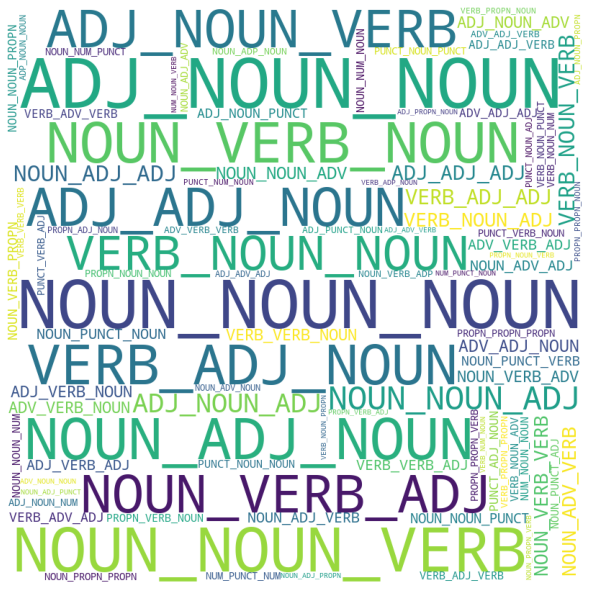

In [765]:
# Join all review texts into a single string
for i in trigram:
    text = " ".join(list1)

# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10, collocations=False).generate(text)

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
# Show the plot
plt.show()

<font size="6">Approach-1 for Keyword Extraction by using the different kind of POS patterns</font>

In [766]:
def frame(doc, window_size):
    correct_list = []
    i = 0
    j = i + window_size - 1
    if window_size == 2:
        while j<len(doc):
            if doc[i].pos_ == "ADJ" and doc[j].pos_ == "NOUN":
                correct_list.append(doc[i].text+ ' ' + doc[j].text)
            elif doc[i].pos_ == "NOUN" and doc[j].pos_ == "VERB":
                correct_list.append(doc[i].text+ ' ' + doc[j].text)
            i=i+1
            j=j+1
    elif window_size == 3:
        while j<len(doc):
            if doc[i].pos_ == "ADJ" and doc[i+1].pos_ == "NOUN" and doc[j].pos_ == "NOUN":
                correct_list.append(doc[i].text+ ' '+ doc[i+1].text + ' ' + doc[j].text)
            elif doc[i].pos_ == "ADJ" and doc[i+1].pos_ == "ADJ" and doc[j].pos_ == "NOUN":
                correct_list.append(doc[i].text+ ' ' + doc[i+1].text + ' ' + doc[j].text)
            elif doc[i].pos_ == "NOUN" and doc[i+1].pos_ == "VERB" and doc[j].pos_ == "ADJ":
                correct_list.append(doc[i].text+ ' ' + doc[i+1].text + ' ' + doc[j].text)
            elif doc[i].pos_ == "NOUN" and doc[i+1].pos_ == "ADJ" and doc[j].pos_ == "NOUN":
                correct_list.append(doc[i].text+ ' ' + doc[i+1].text + ' ' + doc[j].text)
            elif doc[i].pos_ == "ADJ" and doc[i+1].pos_ == "ADP" and doc[j].pos_ == "NOUN":        
                correct_list.append(doc[i].text+ ' ' + doc[i+1].text + ' ' + doc[j].text)  
            i=i+1
            j=j+1
    elif window_size == 4:
        while j<len(doc):
            if doc[i].pos_ == "NOUN" and doc[i+1].pos_ == "VERB" and doc[j-1].pos_ == "ADP" and doc[j].pos_ == "NOUN":
                correct_list.append(doc[i].text+ ' '+ doc[i+1].text + ' ' + doc[j-1].text + ' ' + doc[j].text)
            elif doc[i].pos_ == "NOUN" and doc[i+1].pos_ == "VERB" and doc[j-1].pos_ == "VERB" and doc[j].pos_ == "ADJ":
                correct_list.append(doc[i].text+ ' '+ doc[i+1].text + ' ' + doc[j-1].text + ' ' + doc[j].text)
            elif doc[i].pos_ == "NOUN" and doc[i+1].pos_ == "VERB" and doc[j-1].pos_ == "ADJ" and doc[j].pos_ == "NOUN":
                correct_list.append(doc[i].text+ ' '+ doc[i+1].text + ' ' + doc[j-1].text + ' ' + doc[j].text)
            elif doc[i].pos_ == "AUX" and doc[i+1].pos_ == "PART" and doc[j-1].pos_ == "VERB" and doc[j].pos_ == "NOUN":
                correct_list.append(doc[i].text+ ' '+ doc[i+1].text + ' ' + doc[j-1].text + ' ' + doc[j].text)
            elif doc[i].pos_ == "SCONJ" and doc[i+1].pos_ == "ADP" and doc[j-1].pos_ == "PRON" and doc[j].pos_ == "NOUN":
                correct_list.append(doc[i].text+ ' '+ doc[i+1].text + ' ' + doc[j-1].text + ' ' + doc[j].text)
            elif doc[i].pos_ == "VERB" and doc[i+1].pos_ == "ADJ" and doc[j-1].pos_ == "ADV" and doc[j].pos_ == "ADJ":
                correct_list.append(doc[i].text+ ' '+ doc[i+1].text + ' ' + doc[j-1].text + ' ' + doc[j].text)    
            i=i+1
            j=j+1
    return correct_list                            



In [767]:
nlp = spacy.load("en_core_web_sm")
correct_list = []
for tex in comb_data["Text"]:
    doc = nlp(tex)
    list1 = frame(doc, 2)
    list2 = frame(doc, 3)
    list3 = frame(doc, 4)
    for i in list2:
        for j in list1:
            if j in i:
                list1.remove(j)
                break
    for i in list3:
        for j in list2:
            if j in i:
                list2.remove(j)
                break
    final_list = list1 + list2 + list3
    correct_list.append(final_list)            

In [768]:
data["Approach-1_output"] = correct_list

<font size="6">Approach-2 for Keyword Extraction based on dependent parsing of words</font>

In [704]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
correct_list = []
for tex in comb_data["Text"]:
    
    keyword = []
    queue = []
    # Tokenize the sentence and perform POS tagging
    doc = nlp(tex)
    for token in doc:
        if token.dep_ == "ROOT":
            queue.append(token)
            break
    while len(queue)!=0:
        text = ""
        root = queue.pop(0)
        l1 = []
        root_status = False
        list1 = root.children
        index = tex.find(root.text)
        if root.pos_ == "NOUN":
            for txt in list1:
                if tex.find(txt.text)<index:
                    text = text + ' ' + txt.text
                elif tex.find(txt.text)>index and not root_status:
                    text = text + ' ' + root.text
                    root_status = True    
                l1.append(txt)
            if not root_status:   
                text = text + ' ' + root.text
            keyword.append(text)
        else:
            for txt in list1:
                l1.append(txt)       
        queue = queue + l1  
                  
    correct_list.append(keyword)

In [769]:
for i in correct_list:
    for j in i:
        if len(j)==1:
            i.remove(j) 

In [771]:
data["Approach-2_output"] = correct_list

In [772]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Approach-1_output,Approach-2_output
0,1078,56,great summer fabric!,"i really wanted this to work. alas, it had a s...",3,0,1,General Petite,Dresses,Dresses,"[fabric wanted, breast worked, minute sat, gre...","[fabric wanted, breast worked, minute sat, gre..."
1,1078,51,sweet flattering dress,"i love cute summer dresses and this one, espec...",4,1,0,General Petite,Dresses,Dresses,"[design flattering, bust got, dress wear, swee...","[design flattering, bust got, dress wear, swee..."
2,1078,32,,this is the perfect summer dress. it can be dr...,5,1,2,General Petite,Dresses,Dresses,"[dress dressed, right knees, knees found, true...","[dress dressed, right knees, knees found, true..."
3,1078,61,great sweater dress!,"nice fit and flare style, not clingy at all. i...",5,1,1,General,Dresses,Dresses,"[clingy got, booties lots, options accessorize...","[clingy got, booties lots, options accessorize..."
4,1078,33,"cute, but cheap",when i first opened this dress and tried it on...,3,0,0,General,Dresses,Dresses,"[dress tried, rolling took, package noticed, f...","[dress tried, rolling took, package noticed, f..."


In [773]:
data.to_csv("Final_output.csv")

In [556]:
from rake_nltk import Rake

keyword_extracted = []
for text in comb_data['Text']:
    # Initialize the Rake object
    r = Rake(text)

    # Extract keywords
    r.extract_keywords_from_text(text)

    # Get the ranked keywords
    keywords = r.get_ranked_phrases()

    # Print the keywords
    keyword_extracted.append(keywords)


In [557]:
keyword_extracted

[['great summer fabric wanted work alas strange fit straps stay weird fit breast worked standing minute sat fell shoulders fabric beautiful loved pockets'],
 ['bust got size 10 fits difficult zip material perfect dress wear italy france book tickets',
  'sweet flattering dress love cute summer dresses especially linen unique',
  'little curvy 38',
  'design flattering',
  'foot'],
 ['hit right knees found run true size smaller bust want size tie adjusted lovely',
  'perfect summer dress dressed quality linen fabric nice'],
 ['great sweater dress nice fit flare style clingy got grey color petite large fits perfect wear tights',
  'boots booties lots color options accessorize'],
 ['cute cheap opened dress tried thought adorable flattering hourglass figure hides recent baby weight problem hem rolling took package noticed returned figured problem easily solved good ironing gets worse time wash dress like hem constructed properly'],
 ['super cute flattering love sweater dress compliments ti